In [4]:
import dataset, visualise, model, evaluate

Initializing the data manager
Data manager initialization finished


In [6]:
data_set = dataset.load_data_set('../res/cache/datasets/dataset_158')

In [11]:
test_dp = data_set.data_points[19]

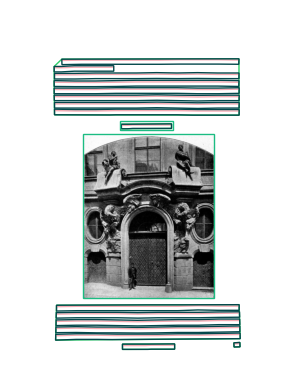

In [8]:
visualise.plot_text_regions(test_dp)

In [38]:
import re
def text_line_len(text: str):
    if re.search(r'(?<=\w)-$', text): 
        return len(text) - 1
    return len(text)
        


In [40]:
def remove_hyphens(in_str):
    return re.sub(r'(?<=\w)-\s(?=\w)', '', str(in_str))


def full_cz_from_regions(dp):
    return [remove_hyphens(' '.join([line.text for line in reg.text_lines if line.text])) for reg in dp.text_regions]


In [51]:
for i, reg in enumerate(test_dp.text_regions):
    for j, line in enumerate(reg.text_lines[:-1]):
        line.org_len = (len(line.text) - 1) if re.search(r'(?<=\w)-$', line.text) else len(line.text) 
    reg.text_lines[-1].org_len = len(reg.text_lines[-1].text)

In [44]:
import nltk

In [53]:
x = [nltk.sent_tokenize(remove_hyphens(' '.join([line.text for line in reg.text_lines if line.text])), language='czech') for reg in test_dp.text_regions]

In [55]:
sentences = [ eel for el in x for eel in el ]

In [66]:
lines = [line.text for line in test_dp.text_lines]

In [93]:
from parse_xml import TextLine

def lines_sentences(dp: dataset.DataPoint) -> list[tuple[list[str], list[TextLine]]]:
    res: list[tuple[list[str], list[TextLine]]] = []
    for _reg in dp.text_regions:
        reg_sens = nltk.sent_tokenize(remove_hyphens(' '.join([_line.text for _line in _reg.text_lines])), language='czech')
        reg_text = [_line for _line in _reg.text_lines]
        res.append((reg_sens, reg_text))
    return res
    

In [128]:
def map_sentences(in_list: list[tuple[list[str], list[TextLine]]]):
    for sentences, lines in in_list:
        last_idx = 0
        s_idx = 0
        l_idx = 0
        while l_idx < len(lines):
            text = lines[l_idx].text
            if len(text) > 1:
                text = lines[l_idx].text[:-1]
            if sen_sub := sentences[s_idx].find(text):
                print(f"matched {l_idx=} {s_idx}")
                last_idx = sen_sub
                l_idx += 1
            else:
                print(f"non-matched {l_idx=} {s_idx=} {last_idx=} {len(sentences)=}")
                print(f"{l_idx=} {lines[l_idx].text=}")
                print(f"{s_idx=} {sentences[s_idx]=}")
                s_idx += 1

In [129]:
map_sentences(lines_sentences(data_set.data_points[100]))

non-matched l_idx=0 s_idx=0 last_idx=0 len(sentences)=46
l_idx=0 lines[l_idx].text='Protože výsledek svých výzkumů uveřejnil ve školní výroční zprávě, zaměřil'
s_idx=0 sentences[s_idx]='Protože výsledek svých výzkumů uveřejnil ve školní výroční zprávě, zaměřil svou práci pedagogicky.'
matched l_idx=0 1
matched l_idx=1 1
matched l_idx=2 1
matched l_idx=3 1
matched l_idx=4 1
matched l_idx=5 1
matched l_idx=6 1
matched l_idx=7 1
matched l_idx=8 1
matched l_idx=9 1
matched l_idx=10 1
matched l_idx=11 1
matched l_idx=12 1
matched l_idx=13 1
matched l_idx=14 1
matched l_idx=15 1
matched l_idx=16 1
matched l_idx=17 1
matched l_idx=18 1
matched l_idx=19 1
matched l_idx=20 1
matched l_idx=21 1
matched l_idx=22 1
matched l_idx=23 1
matched l_idx=24 1
matched l_idx=25 1
matched l_idx=26 1
matched l_idx=27 1
matched l_idx=28 1
matched l_idx=29 1
matched l_idx=30 1
matched l_idx=31 1
matched l_idx=32 1
matched l_idx=33 1
matched l_idx=34 1
matched l_idx=35 1
non-matched l_idx=0 s_idx=0 last_idx=0 l

IndexError: list index out of range

In [127]:
'Protože výsledek svých výzkumů uveřejnil ve školní výroční zprávě, zaměřil svou práci pedagogicky.'.find('Protože výsledek svých výzkumů uveřejnil ve školní výroční zprávě, zaměřil')

0

In [148]:
import sen_split
import importlib
importlib.reload(model)

<module 'model' from 'C:\\Users\\H492635\\PycharmProjects\\KNN\\scripts\\model.py'>

In [134]:
sens = sen_split.create_split_map(test_dp)

In [136]:
sens[0].sentence

'jako radikální a pokrokové, avšak v jádru představují řetězovitě narůstající brzdy rozvoje společnosti i její ekonomiky.'

In [137]:
[ line.text for line in sens[0].positions]

['představují řetězovitě narůstající brzdy',
 'rozvoje společnosti i její ekonomiky.',
 'jako radikální a pokrokové, avšak v jádru']

In [139]:
test_dp.sentences = sen_split.create_split_map(test_dp)

In [146]:
%load_ext autoreload
%autoreload 2

In [150]:
res = model.compute_clip_sentences_dst(test_dp)

In [157]:
list(res.values())[0][0][0].sentence

'287'